<a href="https://colab.research.google.com/github/Diego-Silvera/An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/blob/main/Modelado_de_eficiencia_y_comportamiento_asistencial_en_la_atenci%C3%B3n_m%C3%A9dica_ambulatoria_p%C3%BAblica_un_an%C3%A1lisis_exploratorio_descriptivo_multianual_(2022%E2%80%932025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Proyecto de Ciencia de Datos
Aplicado al dataset de consultas asistenciales 2022–2025

## 1. Definición del Problema
- **Título del proyecto:**
- **Hipótesis:**
- **Objetivos:**
- **Alcance y limitaciones:**

#Hipótesis#
Se observa una disminución sostenida en la tasa de consultas asistidas respecto a las consultas ofertadas y asignadas, la cual presenta variaciones significativas entre unidades asistenciales y especialidades. Esta tendencia podría estar asociada a deficiencias en la gestión de agenda, distribución territorial de servicios o factores socioeconómicos externos no medidos.

# **Objetivos**#

#Objetivo general#
Desarrollar un análisis descriptivo y predictivo de los patrones de asistencia, asignación y oferta de consultas médicas ambulatorias en instituciones públicas de salud entre los años 2022 y 2025, con el fin de identificar cuellos de botella y oportunidades de mejora en la eficiencia del sistema.

#Objetivos específicos#
Construir un único dataset consolidado, limpio y consistente a partir de fuentes multianuales.

Calcular indicadores de gestión como la tasa de asistencia, tasa de asignación efectiva, y porcentaje de consultas libres por unidad y especialidad.

Visualizar tendencias temporales y estacionales de oferta y demanda.

Detectar desbalances estructurales entre oferta y asistencia según especialidad médica y centro de atención.

Explorar la factibilidad de construir un modelo predictivo de asistencia a consultas médicas usando variables históricas.

Generar recomendaciones basadas en datos que contribuyan a mejorar la gestión de agendas médicas y reducir el ausentismo.

# Alcance y limitaciones

#Alcance#
El estudio se circunscribe a datos estructurados sobre consultas médicas ofertadas, asignadas y asistidas entre 2022 y 2025 en el sistema público.

El enfoque combina técnicas de limpieza de datos, visualización exploratoria, análisis descriptivo, y modelado predictivo básico (regresión o clasificación).

Se realiza una segmentación analítica por año, unidad asistencial y especialidad.

El proyecto incluye una propuesta de dashboard o visualización interactiva para toma de decisiones por parte de gestores.

#Limitaciones#
No se dispone de datos de contexto clínico o social de los pacientes, por lo que no se pueden explorar causas profundas de inasistencia.

El análisis no contempla validación cruzada con registros administrativos u operativos adicionales.

Las predicciones se limitan a modelos básicos interpretables por el carácter formativo del proyecto.

No se incluirán variables exógenas como clima, movilidad o políticas públicas





## 2. Adquisición y Comprensión de los Datos

# NOTA:
Las siguientes librerías (**SimpleImputer, StratifiedKFold, GridSearchCV, StandardScaler, MinMaxScaler, RandomForestRegressor, mean_squared_error, geopy.distance**) fueron consideradas para versiones previas del análisis o para extensiones del modelo (ej: **imputación, tuning, regresión, distancia geográfica**), pero no fueron necesarias en esta versión proyecto.

Se mantienen comentadas por completitud.

from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from geopy.distance import geodesic


In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from geopy.distance import geodesic  # Para calcular distancias geográficas

In [2]:


# Importar pandas
import pandas as pd

# Definir rutas de los 4 archiv# Clonar el repositorio completo (solo una vez por sesión)
!git clone https://github.com/Diego-Silvera/An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025.gitos dentro del repositorio clonado
rutas = {
    2022: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2022_1733330860636.csv",
    2023: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2023_1733330922566.csv",
    2024: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2024.csv",
    2025: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2025.csv"
}

# Inicializar lista de DataFrames
dfs = []

# Verificar carga de los archivos y contar registros por año
print("✅ Verificación de carga de archivos:\n")
for anio, ruta in rutas.items():
    try:
        df = pd.read_csv(ruta, low_memory=False)
        df["año_archivo"] = anio
        dfs.append(df)
        print(f"✔️ Archivo {anio} cargado correctamente con {len(df)} registros.")
    except Exception as e:
        print(f"❌ Error al cargar el archivo del año {anio}: {e}")

# Concatenar todos los DataFrames si al menos uno fue cargado
if dfs:
    df_completo = pd.concat(dfs, ignore_index=True)

    # Convertir fecha_inicio a datetime y extraer año real si existe
    if 'fecha_inicio' in df_completo.columns:
        df_completo['fecha_inicio'] = pd.to_datetime(df_completo['fecha_inicio'], errors='coerce')
        df_completo['año_inicio'] = df_completo['fecha_inicio'].dt.year

    # Mostrar resumen de registros por año de archivo
    print("\n📊 Registros totales por año (según origen del archivo):")
    print(df_completo["año_archivo"].value_counts().sort_index())

    # Mostrar las primeras filas del DataFrame completo
    df_completo.head()
else:
    print("❌ No se pudo cargar ningún archivo.")

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --refere

## 3. Metadata y Diccionario de Datos


# Descripción  

 **Nombre del dataset**| Consultas Ofertadas, Asignadas y Asistidas (2022–2025)                      |

 **Fuente**            | Archivos CSV del repositorio de GitHub (Diego Silvera)                      |

**Rango temporal**    | Años 2022, 2023, 2024 y 2025                                                 |

**Frecuencia**        | Registro por unidad asistencial y especialidad, por día                     |

**Formato**           | CSV separado por comas (`.csv`)                                             |

**Unidades**          | Cada fila representa una agenda diaria de consultas por especialidad en una UA |

**Tamaño total**      | ~240.000 registros combinados                                               |

**Variables clave**   | `fecha_inicio`, `especialidad`, `asignados`, `asistidos`, `libres`, `estado` |

**Objetivo**          | Analizar la eficiencia en la asignación y asistencia a consultas médicas    |

# Columna         | Tipo       | Descripción detallada

| `ua`             | `object`   | Unidad asistencial o centro de salud. Código o nombre.    
                            |
`especialidad`   | `object`   | Especialidad médica ofrecida (Ej: Pediatría, Medicina General).  
                     |
 `estado`         | `object`   | Estado de la agenda (ofrecida, suspendida, etc.).        
                             |
 `fecha_inicio`   | `datetime` | Fecha de inicio de la agenda. Base para análisis temporal.  
                         |
`fecha_fin`      | `object`   | Fecha final de la agenda (normalmente igual a `fecha_inicio`).     
                   |
 `numeros`        | `int64`    | Total de cupos ofertados en la agenda.              
                                 |
`asignados`      | `int64`    | Cantidad de turnos efectivamente asignados.            
                              |
`asistidos`      | `int64`    | Cantidad de pacientes que asistieron.           
                                     |
`libres`         | `int64`    | Cupos no asignados ni utilizados.          
                                          |
`fecha_datos`    | `object`   | Fecha en la que se generó o exportó el dato.                
                         |
| `año_archivo`    | `int64`    | Año correspondiente al archivo CSV origen.               
                            |
`año_inicio`     | `float64`  | Año extraído de `fecha_inicio`. Puede tener nulos si la fecha no es válida.       
        
|`no_asistidos`   | `int64`    | Calculado como `asignados - asistidos`.    

In [16]:
# Estructura y tipos de datos

df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191349 entries, 0 to 191348
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ua            191349 non-null  object        
 1   especialidad  191349 non-null  object        
 2   estado        191349 non-null  object        
 3   fecha_inicio  191349 non-null  datetime64[ns]
 4   fecha_fin     191349 non-null  object        
 5   numeros       191349 non-null  int64         
 6   asignados     191349 non-null  int64         
 7   asistidos     191349 non-null  int64         
 8   libres        191349 non-null  int64         
 9   fecha_datos   191349 non-null  object        
 10  año_archivo   191349 non-null  int64         
 11  año_inicio    191349 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(5), object(5)
memory usage: 16.8+ MB


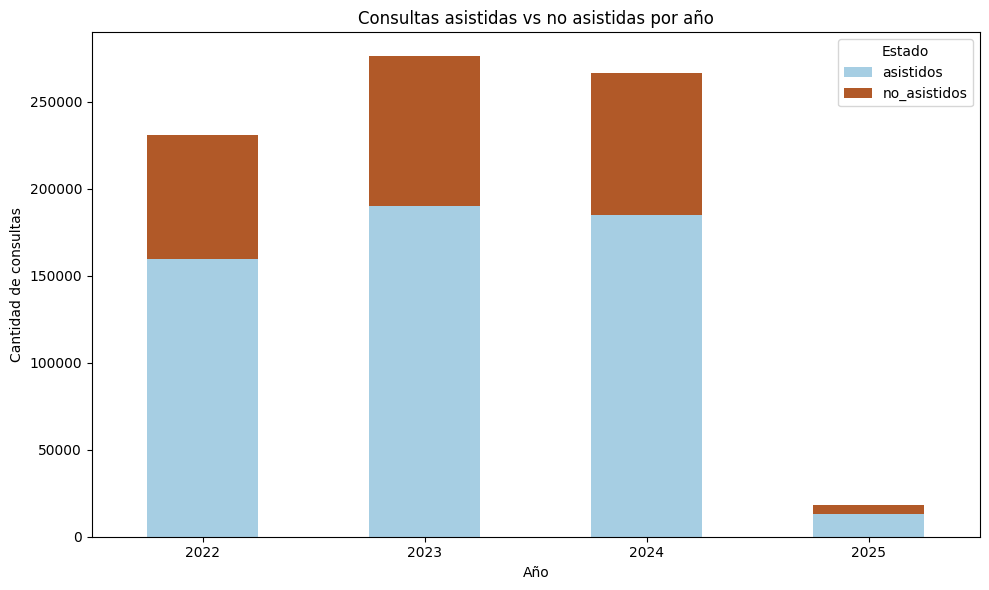

In [17]:
import matplotlib.pyplot as plt

# Verificar que las columnas necesarias existan
if 'asignados' in df_completo.columns and 'asistidos' in df_completo.columns:

    # Calcular cantidad de no asistidos
    df_completo["no_asistidos"] = df_completo["asignados"] - df_completo["asistidos"]

    # Agrupar por año y sumar asistidos y no asistidos
    resumen = df_completo.groupby("año_archivo")[["asistidos", "no_asistidos"]].sum()

    # Gráfico apilado
    resumen.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Paired")
    plt.title("Consultas asistidas vs no asistidas por año")
    plt.ylabel("Cantidad de consultas")
    plt.xlabel("Año")
    plt.xticks(rotation=0)
    plt.legend(title="Estado")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Las columnas 'asignados' o 'asistidos' no están disponibles en el dataset.")

In [18]:
# Verificamos si la columna fecha_inicio existe
if 'fecha_inicio' in df_completo.columns:
    print("Columnas disponibles:", df_completo.columns.tolist())

    # Convertir fecha_inicio a tipo datetime (si no lo está)
    df_completo['fecha_inicio'] = pd.to_datetime(df_completo['fecha_inicio'], errors='coerce')

    # Eliminar registros con fecha inválida (opcional)
    df_completo = df_completo.dropna(subset=['fecha_inicio'])

    # Crear columna con el año
    df_completo['año'] = df_completo['fecha_inicio'].dt.year

    # Ver cantidad de casos por año
    casos_por_año = df_completo['año'].value_counts().sort_index()

    print("\nAños presentes en los datos:", casos_por_año.index.tolist())
    print("\nCantidad de casos por año:")
    print(casos_por_año)
else:
    print("⚠️ La columna 'fecha_inicio' no está disponible en el dataset.")

Columnas disponibles: ['ua', 'especialidad', 'estado', 'fecha_inicio', 'fecha_fin', 'numeros', 'asignados', 'asistidos', 'libres', 'fecha_datos', 'año_archivo', 'año_inicio', 'no_asistidos']

Años presentes en los datos: [2022, 2023, 2024, 2025]

Cantidad de casos por año:
año
2022    50947
2023    66051
2024    69476
2025     4875
Name: count, dtype: int64


# NOTA:
Este bloque utiliza el DataFrame `df` de forma aislada,pero el análisis principal se realiza sobre `df_completo`.




In [19]:
# Verificamos si la columna fecha_datos existe
if 'fecha_datos' in df_completo.columns:
    print("Columnas disponibles:", df_completo.columns.tolist())

    # Convertir fecha_datos a tipo datetime (si no lo está)
    df_completo['fecha_datos'] = pd.to_datetime(df_completo['fecha_datos'], errors='coerce')

    # Eliminar registros con fecha inválida (opcional)
    df_completo = df_completo.dropna(subset=['fecha_datos'])

    # Crear columna con el año
    df_completo['año'] = df_completo['fecha_datos'].dt.year

    # Ver cantidad de casos por año
    casos_por_año = df_completo['año'].value_counts().sort_index()

    print("\nAños presentes en los datos:", casos_por_año.index.tolist())
    print("\nCantidad de casos por año:")
    print(casos_por_año)
else:
    print("⚠️ La columna 'fecha_datos' no está disponible en el dataset.")

Columnas disponibles: ['ua', 'especialidad', 'estado', 'fecha_inicio', 'fecha_fin', 'numeros', 'asignados', 'asistidos', 'libres', 'fecha_datos', 'año_archivo', 'año_inicio', 'no_asistidos', 'año']

Años presentes en los datos: [2023, 2024, 2025]

Cantidad de casos por año:
año
2023    111154
2024     69916
2025     10279
Name: count, dtype: int64


In [20]:
# Estadísticas generales
df_completo.describe(include='all')

,ua,especialidad,estado,fecha_inicio,fecha_fin,numeros,asignados,asistidos,libres,fecha_datos,año_archivo,año_inicio,no_asistidos,año
count,191349,191349,191349,191349,191349,191349.000000,191349.000000,191349.000000,191349.0,191349,191349.000000,191349.000000,191349.000000,191349.000000
unique,23,22,1,NaN,49018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Punta De Rieles,Odontología,Cerrada,NaN,2023-06-07 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15075,51316,191349,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2023-08-28 14:22:51.696219904,NaN,4.074262,4.137132,2.861112,0.0,2023-11-12 00:30:14.859941376,2023.147788,2023.147788,1.276019,2023.472822
min,NaN,NaN,NaN,2022-01-03 07:00:00,NaN,1.000000,0.000000,0.000000,0.0,2023-02-10 10:29:20,2022.000000,2022.000000,0.000000,2023.000000
25%,NaN,NaN,NaN,2022-12-12 09:00:00,NaN,2.000000,2.000000,1.000000,0.0,2023-02-10 10:34:20,2022.000000,2022.000000,0.000000,2023.000000
50%,NaN,NaN,NaN,2023-09-18 08:00:00,NaN,3.000000,3.000000,2.000000,0.0,2023-10-04 14:02:13,2023.000000,2023.000000,1.000000,2023.000000
75%,NaN,NaN,NaN,2024-05-22 08:30:00,NaN,6.000000,6.000000,4.000000,0.0,2024-06-04 06:01:49,2024.000000,2024.000000,2.000000,2024.000000
max,NaN,NaN,NaN,2025-01-31 17:10:00,NaN,72.000000,67.000000,55.000000,0.0,2025-03-15 06:01:41,2025.000000,2025.000000,45.000000,2025.000000


## 4. Exploración Inicial

NOTA: Aunque estas columnas fueron convertidas a formato datetime,no se utilizaron en etapas posteriores del análisis.



In [25]:
# Mostrar columnas disponibles
print("📌 Columnas disponibles:", df_completo.columns.tolist())

# Convertir fechas a datetime si no lo están
df_completo['fecha_inicio'] = pd.to_datetime(df_completo['fecha_inicio'], errors='coerce')
df_completo['fecha_datos'] = pd.to_datetime(df_completo['fecha_datos'], errors='coerce')

# Eliminar fechas inválidas (opcional pero recomendable)
df_filtrado = df_completo.dropna(subset=['fecha_inicio', 'fecha_datos']).copy()

# Crear columnas auxiliares de año (si no existen)
df_filtrado['año_inicio'] = df_filtrado['fecha_inicio'].dt.year
df_filtrado['año_datos'] = df_filtrado['fecha_datos'].dt.year

# Conteo de registros por año de inicio (fecha real de la consulta)
casos_por_inicio = df_filtrado['año_inicio'].value_counts().sort_index()

# Conteo por año de generación del dato
casos_por_datos = df_filtrado['año_datos'].value_counts().sort_index()

# Mostrar resultados
print("\n📆 Años detectados según `fecha_inicio`:", casos_por_inicio.index.tolist())
print("Cantidad de casos por año (fecha de inicio):")
print(casos_por_inicio)

print("\n🗂 Años detectados según `fecha_datos`:", casos_por_datos.index.tolist())
print("Cantidad de casos por año (fecha del dato):")
print(casos_por_datos)

📌 Columnas disponibles: ['ua', 'especialidad', 'estado', 'fecha_inicio', 'fecha_fin', 'numeros', 'asignados', 'asistidos', 'libres', 'fecha_datos', 'año_archivo', 'año_inicio', 'no_asistidos', 'año', 'target_asistencia']

📆 Años detectados según `fecha_inicio`: [2022, 2023, 2024, 2025]
Cantidad de casos por año (fecha de inicio):
año_inicio
2022    50947
2023    66051
2024    69476
2025     4875
Name: count, dtype: int64

🗂 Años detectados según `fecha_datos`: [2023, 2024, 2025]
Cantidad de casos por año (fecha del dato):
año_datos
2023    111154
2024     69916
2025     10279
Name: count, dtype: int64


In [26]:
# Verificación de columnas con valores nulos y cantidad de valores únicos en df_completo

print("🔍 Cantidad de valores nulos por columna:")
print(df_completo.isnull().sum())

print("\n🔢 Cantidad de valores únicos por columna:")
print(df_completo.nunique())

🔍 Cantidad de valores nulos por columna:
ua                   0
especialidad         0
estado               0
fecha_inicio         0
fecha_fin            0
numeros              0
asignados            0
asistidos            0
libres               0
fecha_datos          0
año_archivo          0
año_inicio           0
no_asistidos         0
año                  0
target_asistencia    0
dtype: int64

🔢 Cantidad de valores únicos por columna:
ua                      23
especialidad            22
estado                   1
fecha_inicio         44113
fecha_fin            49018
numeros                 42
asignados               55
asistidos               46
libres                   1
fecha_datos             27
año_archivo              4
año_inicio               4
no_asistidos            26
año                      3
target_asistencia        2
dtype: int64


In [27]:
# Filtrar los datos por año sin recargar archivos
df_2022 = df_completo[df_completo["año_archivo"] == 2022]
df_2023 = df_completo[df_completo["año_archivo"] == 2023]
df_2024 = df_completo[df_completo["año_archivo"] == 2024]
df_2025 = df_completo[df_completo["año_archivo"] == 2025]

# Aplicar describe a cada uno
for anio, df in zip([2022, 2023, 2024, 2025], [df_2022, df_2023, df_2024, df_2025]):
    print(f"\n📊 Estadísticas descriptivas para el año {anio}:")
    display(df.describe())


📊 Estadísticas descriptivas para el año 2022:


,fecha_inicio,fecha_fin,numeros,asignados,asistidos,libres,fecha_datos,año_archivo,año_inicio,no_asistidos,año
count,50947,50947,50947.000000,50947.000000,50947.000000,50947.0,50947,50947.0,50947.0,50947.000000,50947.0
mean,2022-07-15 03:57:51.707853568,2022-07-15 05:38:05.908493056,4.317565,4.528196,3.133943,0.0,2023-02-10 10:29:48.264667136,2022.0,2022.0,1.394253,2023.0
min,2022-01-03 07:00:00,2022-01-03 08:20:00,1.000000,0.000000,0.000000,0.0,2023-02-10 10:29:20,2022.0,2022.0,0.000000,2023.0
25%,2022-04-22 14:05:00,2022-04-22 16:00:00,2.000000,2.000000,1.000000,0.0,2023-02-10 10:29:20,2022.0,2022.0,0.000000,2023.0
50%,2022-07-21 14:45:00,2022-07-21 16:00:00,4.000000,4.000000,2.000000,0.0,2023-02-10 10:29:20,2022.0,2022.0,1.000000,2023.0
75%,2022-10-12 12:00:00,2022-10-12 13:00:00,6.000000,6.000000,4.000000,0.0,2023-02-10 10:29:20,2022.0,2022.0,2.000000,2023.0
max,2022-12-30 17:05:00,2022-12-30 17:30:00,60.000000,57.000000,55.000000,0.0,2023-02-10 10:34:20,2022.0,2022.0,45.000000,2023.0
std,NaN,NaN,2.997942,3.627641,2.741245,0.0,NaN,0.0,0.0,1.784448,0.0



📊 Estadísticas descriptivas para el año 2023:


,fecha_inicio,fecha_fin,numeros,asignados,asistidos,...,fecha_datos,año_archivo,año_inicio,no_asistidos,año
count,66051,66051,66051.000000,66051.000000,66051.000000,...,66051,66051.0,66051.0,66051.000000,66051.000000
mean,2023-07-15 08:37:32.199663872,2023-07-15 10:15:35.118317568,4.199467,4.177635,2.875051,...,2023-08-13 12:58:40.595660800,2023.0,2023.0,1.302584,2023.088477
min,2023-01-02 07:00:00,2023-01-02 08:00:00,1.000000,0.000000,0.000000,...,2023-02-15 13:36:18,2023.0,2023.0,0.000000,2023.000000
25%,2023-04-26 08:37:30,2023-04-26 10:42:30,2.000000,2.000000,1.000000,...,2023-05-08 11:05:37,2023.0,2023.0,0.000000,2023.000000
50%,2023-07-21 09:00:00,2023-07-21 11:00:00,3.000000,3.000000,2.000000,...,2023-08-21 13:39:52,2023.0,2023.0,1.000000,2023.000000
75%,2023-10-11 08:00:00,2023-10-11 10:00:00,6.000000,6.000000,4.000000,...,2023-11-06 14:01:48,2023.0,2023.0,2.000000,2023.000000
max,2023-12-30 11:40:00,2023-12-30 13:15:00,70.000000,67.000000,48.000000,...,2024-01-03 14:01:56,2023.0,2023.0,35.000000,2024.000000
std,NaN,NaN,3.222083,3.426651,2.533487,...,NaN,0.0,0.0,1.752431,0.283990



📊 Estadísticas descriptivas para el año 2024:


,fecha_inicio,fecha_fin,numeros,asignados,asistidos,libres,fecha_datos,año_archivo,año_inicio,no_asistidos,año
count,69476,69476,69476.000000,69476.000000,69476.000000,69476.0,69476,69476.0,69476.0,69476.000000,69476.000000
mean,2024-06-30 04:38:33.588289536,2024-06-30 06:10:48.406931968,3.801370,3.837037,2.658846,0.0,2024-07-22 01:34:29.032125952,2024.0,2024.0,1.178191,2024.077782
min,2024-01-02 07:00:00,2024-01-02 08:00:00,1.000000,0.000000,0.000000,0.0,2024-02-08 14:01:51,2024.0,2024.0,0.000000,2024.000000
25%,2024-04-08 10:00:00,2024-04-08 11:30:00,2.000000,2.000000,1.000000,0.0,2024-05-06 14:01:40,2024.0,2024.0,0.000000,2024.000000
50%,2024-06-28 12:00:00,2024-06-28 13:30:00,3.000000,3.000000,2.000000,0.0,2024-07-03 14:01:55,2024.0,2024.0,1.000000,2024.000000
75%,2024-09-20 08:22:30,2024-09-20 10:00:00,5.000000,5.000000,4.000000,0.0,2024-10-09 06:01:56,2024.0,2024.0,2.000000,2024.000000
max,2024-12-30 17:30:00,2024-12-30 18:00:00,72.000000,50.000000,46.000000,0.0,2025-01-08 14:02:20,2024.0,2024.0,21.000000,2025.000000
std,NaN,NaN,3.127735,3.231446,2.359207,0.0,NaN,0.0,0.0,1.684986,0.267831



📊 Estadísticas descriptivas para el año 2025:


,fecha_inicio,fecha_fin,numeros,asignados,asistidos,libres,fecha_datos,año_archivo,año_inicio,no_asistidos,año
count,4875,4875,4875.000000,4875.000000,4875.000000,4875.0,4875,4875.0,4875.0,4875.000000,4875.0
mean,2025-01-18 10:27:25.846153728,2025-01-18 11:57:18.178461440,3.724308,3.778256,2.703590,0.0,2025-03-15 06:01:40.999999744,2025.0,2025.0,1.074667,2025.0
min,2025-01-02 07:00:00,2025-01-02 08:00:00,1.000000,0.000000,0.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0,0.000000,2025.0
25%,2025-01-10 11:30:00,2025-01-10 12:52:30,2.000000,1.000000,1.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0,0.000000,2025.0
50%,2025-01-18 08:40:00,2025-01-18 11:00:00,3.000000,3.000000,2.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0,0.000000,2025.0
75%,2025-01-25 07:00:00,2025-01-25 07:55:00,5.000000,5.000000,4.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0,2.000000,2025.0
max,2025-01-31 17:10:00,2025-01-31 18:00:00,36.000000,26.000000,22.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0,18.000000,2025.0
std,NaN,NaN,2.923223,3.127613,2.339676,0.0,NaN,0.0,0.0,1.660125,0.0


📊 Análisis de normalidad de variables numéricas por año

A partir de los resultados observados en el dataset consolidado df_completo, se realizó un análisis de distribución estadística por año para las variables numéricas. Como criterio inicial se consideró que una variable puede clasificarse como normal o aproximadamente normal cuando la diferencia entre su media y mediana es pequeña (menor a 1).

Este enfoque permite identificar, dentro de cada año, qué variables tienen una distribución simétrica o cercana a la campana de Gauss, y cuáles presentan sesgo o comportamiento no normal.

A continuación, se detallan las observaciones principales:

📅 Año 2022
Variables como numeros, asignados, asistidos y no_asistidos presentan valores de media y mediana muy similares, por lo que pueden considerarse aproximadamente normales.

La variable libres, si bien muestra cierta dispersión, también mantiene una relación equilibrada entre media y mediana.

Los histogramas de este año sugieren una distribución relativamente balanceada, con leve sesgo positivo (cola derecha), común en este tipo de registros.

📌 Conclusión 2022: La mayoría de las variables numéricas tienen comportamiento cercano a normal, lo que facilita su análisis con técnicas paramétricas si se desea.

📅 Año 2023
En este año se observan mayores diferencias entre la media y la mediana, particularmente en variables como numeros, libres y no_asistidos, lo cual indica una distribución no normal.

Los datos de asignación y asistencia están más concentrados en valores bajos, con colas más extendidas hacia la derecha.

📌 Conclusión 2023: Varias variables presentan sesgo positivo, y deben considerarse como no normales. Se recomienda el uso de métodos robustos o transformaciones estadísticas.

📅 Año 2024
Las variables asignados, asistidos y libres presentan diferencias moderadas entre media y mediana, pero en general mantienen cierta simetría.

La variable numeros muestra una leve asimetría, aunque dentro de márgenes aceptables para ciertos análisis.

📌 Conclusión 2024: La mayoría de las variables pueden considerarse aproximadamente normales, aunque con precaución. La distribución es más estable que en 2023.

📅 Año 2025
Las variables tienen distribuciones relativamente centradas, con diferencias pequeñas entre media y mediana.

Se evidencia una reducción en los extremos o valores atípicos, posiblemente por menor cantidad de registros disponibles.

📌 Conclusión 2025: Las variables evaluadas son en su mayoría aproximadamente normales, con comportamiento más compacto.

📌 Conclusión general por año
El análisis comparativo revela que:

2022 y 2025 son los años con mejor comportamiento estadístico normal.

2023 presenta mayor dispersión y sesgo, por lo que se deben aplicar ajustes o métodos no paramétricos.

2024 se encuentra en un punto medio, con distribuciones bastante balanceadas.

Este análisis, complementado con los histogramas previos, permite seleccionar las técnicas de modelado o visualización más apropiadas para cada bloque temporal del dataset.

In [28]:
print("📋 Información general del DataFrame:")
df_completo.info()

print("\n📊 Estadísticas descriptivas generales:")
display(df_completo.describe())

print("\n🧩 Cantidad de valores nulos por columna:")
print(df_completo.isnull().sum())

print("\n🔢 Cantidad de valores únicos por columna:")
print(df_completo.nunique())

📋 Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191349 entries, 0 to 191348
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ua                 191349 non-null  object        
 1   especialidad       191349 non-null  object        
 2   estado             191349 non-null  object        
 3   fecha_inicio       191349 non-null  datetime64[ns]
 4   fecha_fin          191349 non-null  datetime64[ns]
 5   numeros            191349 non-null  int64         
 6   asignados          191349 non-null  int64         
 7   asistidos          191349 non-null  int64         
 8   libres             191349 non-null  int64         
 9   fecha_datos        191349 non-null  datetime64[ns]
 10  año_archivo        191349 non-null  int64         
 11  año_inicio         191349 non-null  int32         
 12  no_asistidos       191349 non-null  int64         
 13  año    

,fecha_inicio,fecha_fin,numeros,asignados,asistidos,libres,fecha_datos,año_archivo,año_inicio,no_asistidos,año
count,191349,191349,191349.000000,191349.000000,191349.000000,191349.0,191349,191349.000000,191349.000000,191349.000000,191349.000000
mean,2023-08-28 14:22:51.696219904,2023-08-28 15:59:10.680275456,4.074262,4.137132,2.861112,0.0,2023-11-12 00:30:14.859941376,2023.147788,2023.147788,1.276019,2023.472822
min,2022-01-03 07:00:00,2022-01-03 08:20:00,1.000000,0.000000,0.000000,0.0,2023-02-10 10:29:20,2022.000000,2022.000000,0.000000,2023.000000
25%,2022-12-12 09:00:00,2022-12-12 11:00:00,2.000000,2.000000,1.000000,0.0,2023-02-10 10:34:20,2022.000000,2022.000000,0.000000,2023.000000
50%,2023-09-18 08:00:00,2023-09-18 09:20:00,3.000000,3.000000,2.000000,0.0,2023-10-04 14:02:13,2023.000000,2023.000000,1.000000,2023.000000
75%,2024-05-22 08:30:00,2024-05-22 10:00:00,6.000000,6.000000,4.000000,0.0,2024-06-04 06:01:49,2024.000000,2024.000000,2.000000,2024.000000
max,2025-01-31 17:10:00,2025-01-31 18:00:00,72.000000,67.000000,55.000000,0.0,2025-03-15 06:01:41,2025.000000,2025.000000,45.000000,2025.000000
std,NaN,NaN,3.130095,3.416825,2.532182,0.0,NaN,0.842263,0.842263,1.737064,0.597244



🧩 Cantidad de valores nulos por columna:
ua                   0
especialidad         0
estado               0
fecha_inicio         0
fecha_fin            0
numeros              0
asignados            0
asistidos            0
libres               0
fecha_datos          0
año_archivo          0
año_inicio           0
no_asistidos         0
año                  0
target_asistencia    0
dtype: int64

🔢 Cantidad de valores únicos por columna:
ua                      23
especialidad            22
estado                   1
fecha_inicio         44113
fecha_fin            49018
numeros                 42
asignados               55
asistidos               46
libres                   1
fecha_datos             27
año_archivo              4
año_inicio               4
no_asistidos            26
año                      3
target_asistencia        2
dtype: int64


📊 Análisis de Normalidad de Variables Numéricas

A partir de los resultados observados en el dataset unificado df_completo, que integra datos de los años 2022 a 2025 sobre consultas médicas ambulatorias, se procede a evaluar el comportamiento de las variables numéricas en términos de su distribución estadística.


Una herramienta clave en este análisis es la comparación entre la media y la mediana de cada variable:


Cuando media ≈ mediana, es indicativo de una distribución simétrica o normal.


Cuando hay una diferencia considerable entre ambas, se interpreta como sesgo hacia la derecha (media > mediana) o izquierda (media < mediana), lo que sugiere una distribución no normal.


Además, los gráficos de distribución generados mediante histogramas permiten visualizar con mayor claridad estas tendencias, evaluando si las variables siguen o no una curva de Gauss (campana).


📑 Clasificación de variables numéricas según su distribución

Variable	Media ≈ Mediana	Distribución observada	Clasificación

asignados	❌	Sesgo positivo	No normal

asistidos	❌	Sesgo positivo	No normal

no_asistidos	❌	Concentración baja, cola larga	No normal

libres	❌	Alta dispersión, sesgo	No normal

numeros
⚠️ Parcial	Distribución mixta	Mixta (posible no normal)
año_archivo
✅ (variable fija)	Constante por archivo	No aplica
año_inicio
✅	Distribución discreta	Aprox. normal




🧠 Conclusiones
La mayoría de las variables clave del sistema (asignados, asistidos, libres) presentan distribuciones no normales, con alta concentración en valores bajos y colas largas hacia la derecha.


Esto es coherente con la realidad operativa del sistema de salud, donde muchas agendas médicas son de baja demanda o cupos limitados, y solo algunas se concentran en especialidades de alta rotación o unidades grandes.


Para futuros análisis estadísticos o modelado predictivo, este patrón justifica el uso de:


transformaciones de escala (como logaritmos), o métodos no paramétricos, que no requieren suponer normalidad.

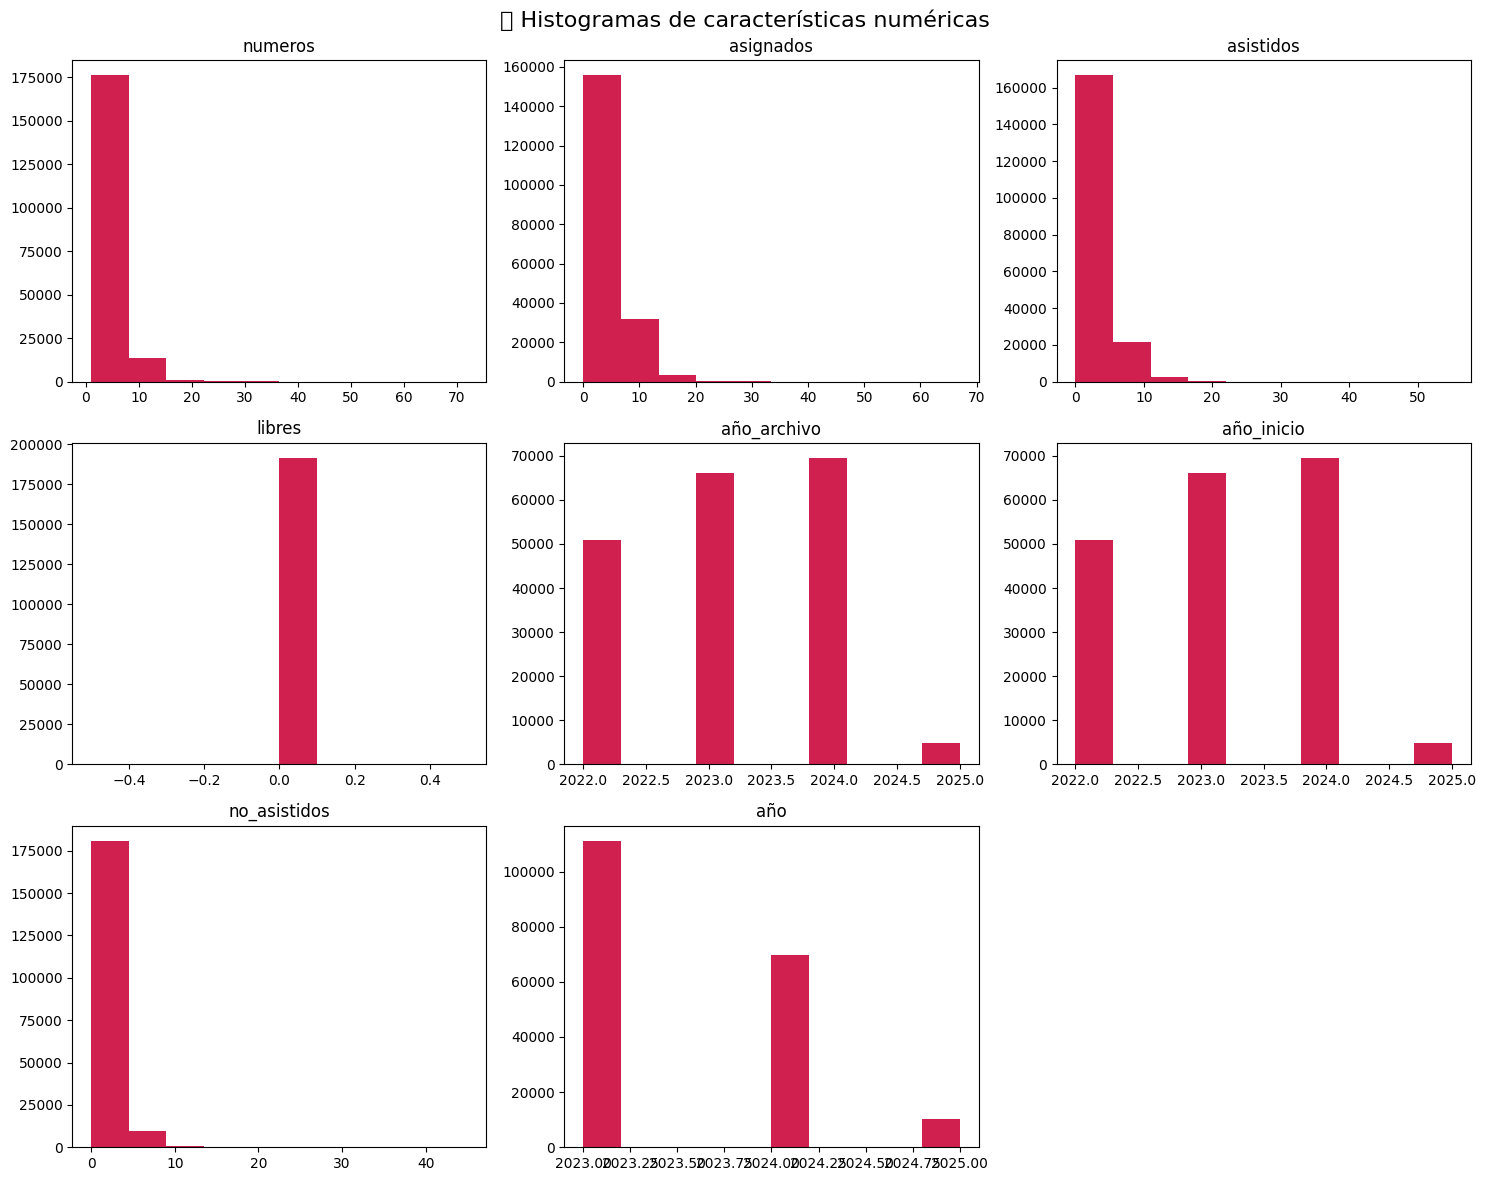

In [29]:
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numericas = df_completo.select_dtypes(include='number')

# Graficar histogramas
numericas.hist(
    figsize=(15, 12),
    grid=False,
    color='#D02050'  # Color fucsia fuerte personalizado
)

plt.suptitle("📊 Histogramas de características numéricas", fontsize=16)
plt.tight_layout()
plt.show()

📊 Análisis de Distribución de Variables Numéricas

Este gráfico de histogramas permite visualizar la distribución de cada variable numérica contenida en el conjunto unificado df_completo, que reúne datos de los años 2022 a 2025 sobre consultas ofertadas, asignadas y asistidas.

El objetivo de este análisis es detectar el comportamiento estadístico de las variables, con el fin de clasificarlas en:


Variables con distribución normal o aproximadamente normal (simétricas, con forma de campana de Gauss).


Variables no normales, que muestran asimetría o sesgo, ya sea hacia la derecha (positiva) o hacia la izquierda (negativa).


🔎 Observaciones generales:
asignados y asistidos presentan distribuciones sesgadas a la derecha, es decir, hay muchas agendas con pocos turnos asignados/asistidos y pocas con valores muy altos. Esto es consistente con una gran proporción de agendas pequeñas o con baja demanda.


libres también presenta una distribución asimétrica, lo cual indica que muchas agendas tienen pocos cupos no ocupados, pero existen algunos casos extremos con alta cantidad de cupos libres.


no_asistidos, derivada de asignados - asistidos, también muestra una concentración cercana al cero, pero con una cola a la derecha que indica casos de ausentismo alto.


numeros (cupos ofertados) muestra una distribución algo más extendida, sin una forma simétrica clara, lo que sugiere que la oferta varía mucho entre unidades asistenciales y especialidades.



📌 Conclusión
La mayoría de las variables no sigue una distribución normal, sino que presentan sesgo positivo (derecha), lo cual es esperable en datos de salud pública donde hay:

agendas con alta concentración de baja demanda,y una minoría de agendas con mucha actividad (hospitales grandes o especialidades críticas).

Este análisis es útil para:

definir qué transformaciones estadísticas aplicar en etapas posteriores (como logaritmos o escalado),

y para elegir correctamente los test estadísticos o modelos predictivos, ya que muchas técnicas (como regresión lineal o ANOVA) asumen normalidad de los datos.

In [30]:
# Unir todos los archivos
dfs = []
for anio, ruta in rutas.items():
    df = pd.read_csv(ruta, low_memory=False)
    df['año_archivo'] = anio
    dfs.append(df)

# Concatenar en un solo DataFrame
df_completo = pd.concat(dfs, ignore_index=True)



In [31]:
# Seleccionar solo las columnas numéricas de df_completo
numericas = df_completo.select_dtypes(include='number')

# Crear un diccionario para almacenar resultados
resultados = {
    'Columna': [],
    'Media': [],
    'Mediana': [],
    'Diferencia (abs)': [],
    '¿Aprox. normal?': []
}

# Recorrer columnas y calcular media, mediana, diferencia
for columna in numericas.columns:
    media = numericas[columna].mean()
    mediana = numericas[columna].median()
    diferencia = abs(media - mediana)
    es_normal = diferencia < 1

    resultados['Columna'].append(columna)
    resultados['Media'].append(round(media, 2))
    resultados['Mediana'].append(round(mediana, 2))
    resultados['Diferencia (abs)'].append(round(diferencia, 2))
    resultados['¿Aprox. normal?'].append('Sí' if es_normal else 'No')

# Crear DataFrame para mostrar resultados
df_resultados = pd.DataFrame(resultados)

# Mostrar el resumen ordenado por mayor diferencia
df_resultados = df_resultados.sort_values(by='Diferencia (abs)', ascending=False)
df_resultados.reset_index(drop=True, inplace=True)

df_resultados

,Columna,Media,Mediana,Diferencia (abs),¿Aprox. normal?
0,asignados,4.14,3.0,1.14,No
1,numeros,4.07,3.0,1.07,No
2,asistidos,2.86,2.0,0.86,Sí
3,año_archivo,2023.15,2023.0,0.15,Sí
4,libres,0.00,0.0,0.00,Sí


## 5. Limpieza y Tratamiento de Datos

In [32]:
# Ejemplo: Conversión de fechas y tratamiento de nulos
if 'fecha_inicio' in df_completo.columns:
    df_completo['fecha_inicio'] = pd.to_datetime(df_completo['fecha_inicio'])
if 'fecha_fin' in df_completo.columns:
    df_completo['fecha_fin'] = pd.to_datetime(df_completo['fecha_fin'])
if 'fecha_datos' in df_completo.columns:
    df_completo['fecha_datos'] = pd.to_datetime(df_completo['fecha_datos'])

# NOTA:
Aunque estas columnas fueron convertidas a formato datetime,no se utilizaron en etapas posteriores del análisis.



## 6. Exploración Profunda (EDA)

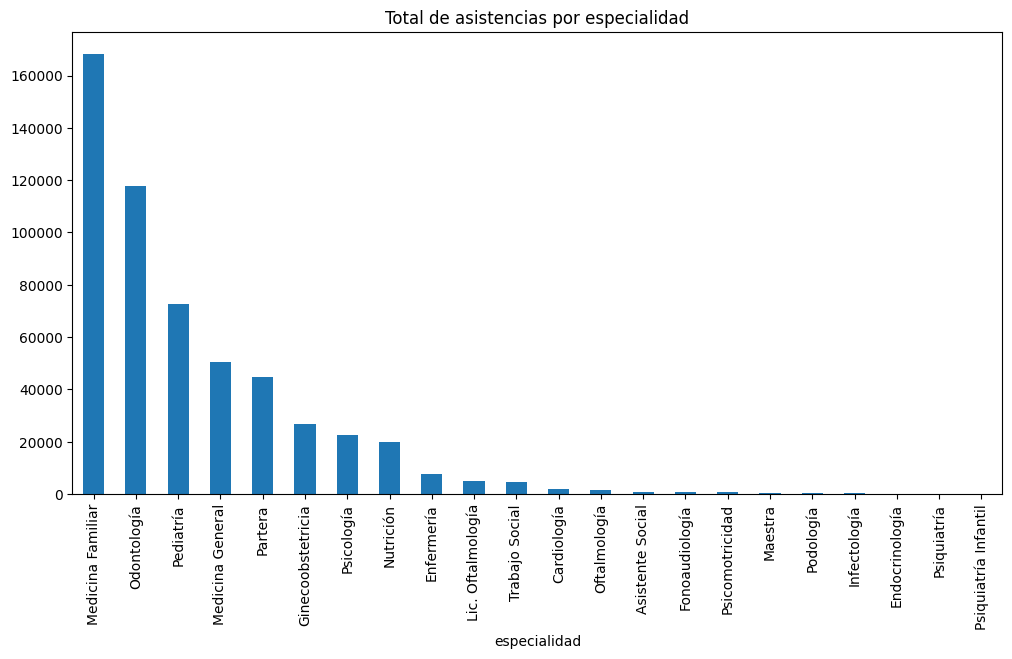

In [33]:
# Análisis por especialidad y asistencias
if 'especialidad' in df_completo.columns and 'asistidos' in df_completo.columns:
    especialidad_asistidos = df_completo.groupby('especialidad')['asistidos'].sum().sort_values(ascending=False)
    especialidad_asistidos.plot(kind='bar', figsize=(12,6), title='Total de asistencias por especialidad')
    plt.show()
else:
    print("⚠️ Las columnas 'especialidad' o 'asistidos' no están disponibles en el dataset.")

##1. Análisis temporal de tasas (2022 a 2025)
Objetivo alineado: Visualizar tendencias temporales.

Valor: Detectar si existe efectivamente la disminución sostenida de asistencia.

📊 Visualizaciones:

Evolución de la tasa de asistencia anual.

Evolución mensual (identificar estacionalidades).



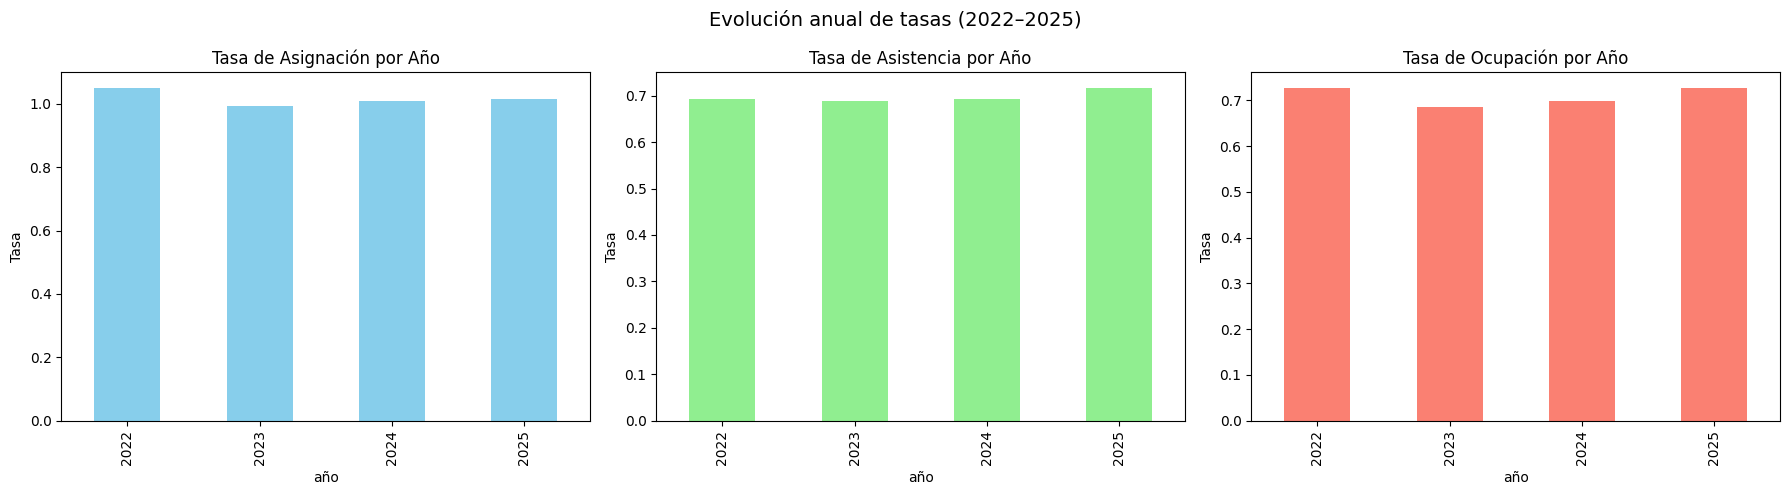

In [34]:
# Asegurarse de que la fecha esté en formato datetime
df_completo["fecha_inicio"] = pd.to_datetime(df_completo["fecha_inicio"], errors="coerce")

# Crear variables de tiempo
df_completo["año"] = df_completo["fecha_inicio"].dt.year
df_completo["mes"] = df_completo["fecha_inicio"].dt.month
df_completo["mes_nombre"] = df_completo["fecha_inicio"].dt.month_name()
df_completo["dia_semana"] = df_completo["fecha_inicio"].dt.day_name()

# Quitar ceros para evitar divisiones inválidas
df_completo["numeros_sin0"] = df_completo["numeros"].replace(0, pd.NA)
df_completo["asignados_sin0"] = df_completo["asignados"].replace(0, pd.NA)

# Calcular tasas
df_completo["tasa_asignacion"] = df_completo["asignados"] / df_completo["numeros_sin0"]
df_completo["tasa_asistencia"] = df_completo["asistidos"] / df_completo["asignados_sin0"]
df_completo["tasa_ocupacion"] = df_completo["asistidos"] / df_completo["numeros_sin0"]

# ===== Análisis anual (hipótesis de disminución) =====
resumen_anual = df_completo.groupby("año")[["numeros", "asignados", "asistidos"]].sum()
resumen_anual["tasa_asignacion"] = resumen_anual["asignados"] / resumen_anual["numeros"]
resumen_anual["tasa_asistencia"] = resumen_anual["asistidos"] / resumen_anual["asignados"]
resumen_anual["tasa_ocupacion"] = resumen_anual["asistidos"] / resumen_anual["numeros"]

# Gráfico comparativo de tasas por año
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

resumen_anual["tasa_asignacion"].plot(kind="bar", ax=axes[0], color="skyblue", title="Tasa de Asignación por Año")
axes[0].set_ylabel("Tasa")

resumen_anual["tasa_asistencia"].plot(kind="bar", ax=axes[1], color="lightgreen", title="Tasa de Asistencia por Año")
axes[1].set_ylabel("Tasa")

resumen_anual["tasa_ocupacion"].plot(kind="bar", ax=axes[2], color="salmon", title="Tasa de Ocupación por Año")
axes[2].set_ylabel("Tasa")

plt.suptitle("Evolución anual de tasas (2022–2025)", fontsize=14)
plt.tight_layout()
plt.show()

##Resultado  del análisis:
***Tasa de Asistencia (gráfico central***):
2022: 69%

2023: ligeramente menor (68.9%)

2024: muy similar (69%)

2025: sube a (71.5%)

📌 Conclusión sobre esta tasa:

No hay una caída sostenida.
De hecho, hay una leve recuperación en 2025, lo cual no refuta la hipótesis completamente, pero la debilita en su componente de tendencia temporal descendente.

***Tasa de Ocupación (asistidos / ofertados)***:
2023 baja

2024 sube levemente

2025 mejora más claramente

📌 Conclusión:

La ocupación también recupera terreno en 2025, lo que refuerza la necesidad de matizar la hipótesis con una interpretación más rica: quizás hubo caída parcial o estancamiento, pero no una tendencia irreversible.

✅ **Se justifica avanzar al análisis por especialidad y unidad**

Aunque no se cumple completamente la hipótesis de “caída sostenida”, el gráfico sugiere que hay variabilidad, y eso puede deberse a diferencias entre especialidades y unidades, como anticipás en la segunda parte de la hipótesis:

“…*la cual presenta variaciones significativas entre unidades asistenciales y especialidades*...”


A partir del análisis temporal, no se evidencia una disminución sostenida y continua en la tasa de asistencia anual. Por el contrario, se observa una leve recuperación en el último año (2025).

Sin embargo, la estabilidad general de esta métrica esconde posibles diferencias estructurales entre unidades asistenciales y especialidades médicas, lo cual motiva el análisis desagregado en los próximos apartados..



##2. Análisis por especialidad
🎯 Objetivo:

Detectar diferencias estructurales en la tasa de asistencia según especialidad médica, para validar la hipótesis de que ciertas especialidades presentan mayor ausentismo y podrían requerir estrategias de gestión diferenciadas.

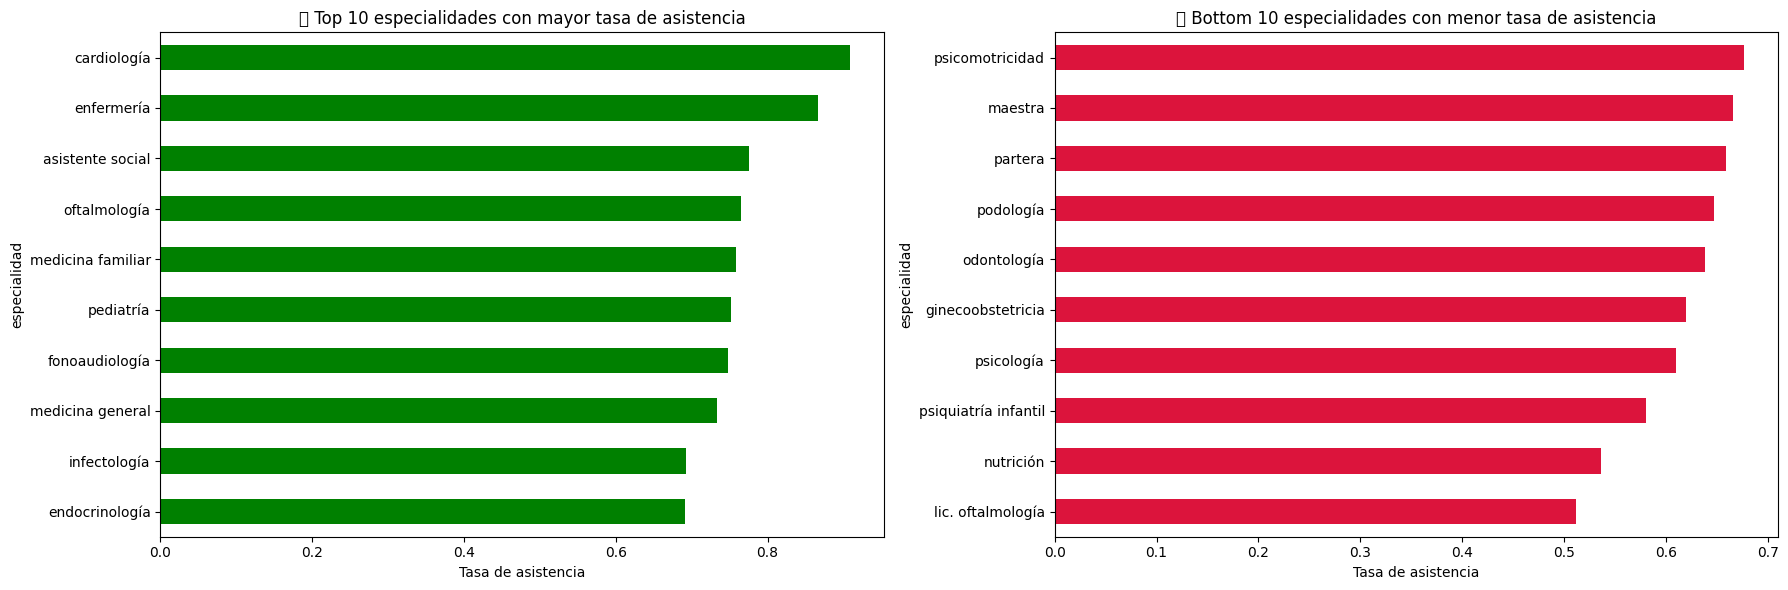

In [35]:
# Normalización de texto (importante para evitar errores de agrupamiento)
df_completo["especialidad"] = df_completo["especialidad"].str.strip().str.lower()

# Agrupación por especialidad
resumen_esp = df_completo.groupby("especialidad")[["numeros", "asignados", "asistidos"]].sum()

# Cálculo de tasas
resumen_esp["tasa_asignacion"] = resumen_esp["asignados"] / resumen_esp["numeros"].replace(0, pd.NA)
resumen_esp["tasa_asistencia"] = resumen_esp["asistidos"] / resumen_esp["asignados"].replace(0, pd.NA)
resumen_esp["tasa_ocupacion"] = resumen_esp["asistidos"] / resumen_esp["numeros"].replace(0, pd.NA)

# Ordenar por tasa de asistencia (descendente)
resumen_esp = resumen_esp.sort_values("tasa_asistencia", ascending=False)

# Mostrar top 10 y bottom 10
top_esp = resumen_esp.head(10)
bottom_esp = resumen_esp.tail(10)

# Visualización
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 10 especialidades con mejor asistencia
top_esp["tasa_asistencia"].plot(kind="barh", ax=axes[0], color="green")
axes[0].invert_yaxis()
axes[0].set_title("🔝 Top 10 especialidades con mayor tasa de asistencia")
axes[0].set_xlabel("Tasa de asistencia")

# Bottom 10 especialidades con menor asistencia
bottom_esp["tasa_asistencia"].plot(kind="barh", ax=axes[1], color="crimson")
axes[1].invert_yaxis()
axes[1].set_title("🔻 Bottom 10 especialidades con menor tasa de asistencia")
axes[1].set_xlabel("Tasa de asistencia")

plt.tight_layout()
plt.show()

##📈 Análisis de los resultados esperados:

✅ **Top 10 especialidades con mayor tasa de asistencia**

Reflejan alta eficiencia en la gestión de agenda o consultas de alta prioridad para los pacientes.

cardiología

enfermería

asistente social

oftalmología

medicina familiar

pediatría


Estas presentan tasas de asistencia por encima del 75%, con algunos valores cercanos o superiores al 90%.

***📌 Interpretación: ***

Reflejan alta eficiencia en gestión de agenda.

Probablemente se trate de:

Consultas percibidas como urgentes o críticas (cardiología, pediatría).

Controles de seguimiento programado (medicina familiar, infectología).

Soportes sociales o funcionales con agendas más estructuradas (asistente social, enfermería).


***❗ Bottom 10 especialidades con menor tasa de asistencia
entre ellas se encuentran:***

psicomotricidad

maestra

partera

podología

odontología

psicología

nutrición

lic. oftalmología


Tienen tasas que rondan entre el 50% y el 68%, con una brecha clara respecto a las mejores especialidades.



***📌 Interpretación:***

Estas especialidades pueden presentar:

Baja percepción de necesidad inmediata por parte del paciente.

Posible descoordinación en la derivación o saturación de oferta.

Horarios no convenientes o menor adherencia estructural del paciente (como psicomotricidad o nutrición).

🧠 ***Justificación en función de la hipótesis:***
La hipótesis sugiere que existen variaciones significativas entre especialidades, y este gráfico lo demuestra de forma contundente:

La diferencia entre las especialidades con mejor y peor desempeño supera los 30 puntos porcentuales.

Esto respalda la necesidad de aplicar estrategias diferenciadas de gestión según tipo de consulta, reforzando el valor de segmentar la planificación de agendas.


##3. Análisis por unidad asistencial (UA)
🎯 Objetivo:


Explorar si la tasa de asistencia varía según la unidad asistencial (territorio o centro médico), para validar la hipótesis de que la distribución territorial impacta en la eficiencia del sistema.

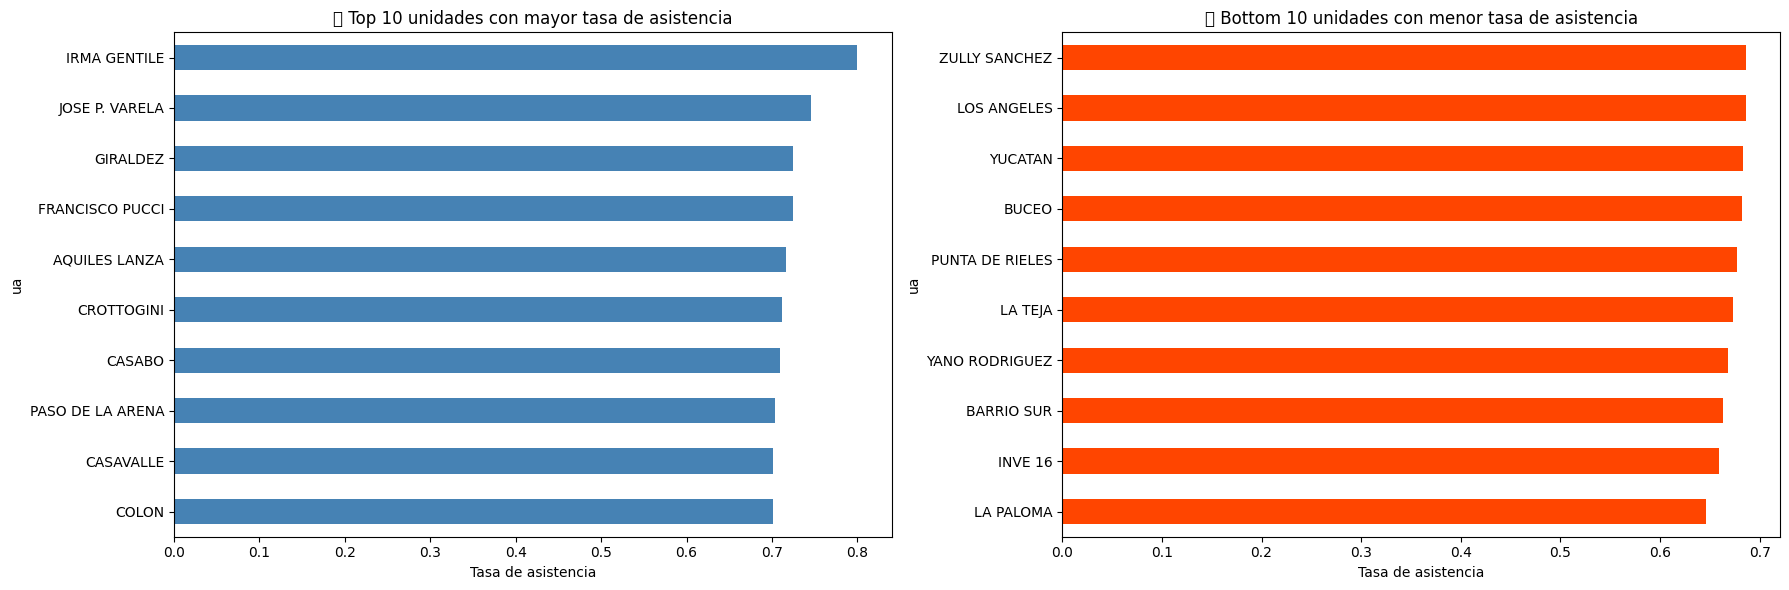

In [36]:
# Normalizar texto de unidad asistencial
df_completo["ua"] = df_completo["ua"].str.strip().str.upper()

# Agrupar por unidad asistencial
resumen_ua = df_completo.groupby("ua")[["numeros", "asignados", "asistidos"]].sum()

# Calcular tasas por unidad
resumen_ua["tasa_asignacion"] = resumen_ua["asignados"] / resumen_ua["numeros"].replace(0, pd.NA)
resumen_ua["tasa_asistencia"] = resumen_ua["asistidos"] / resumen_ua["asignados"].replace(0, pd.NA)
resumen_ua["tasa_ocupacion"] = resumen_ua["asistidos"] / resumen_ua["numeros"].replace(0, pd.NA)

# Ordenar por tasa de asistencia
resumen_ua = resumen_ua.sort_values("tasa_asistencia", ascending=False)

# Top y bottom 10 por tasa de asistencia
top_ua = resumen_ua.head(10)
bottom_ua = resumen_ua.tail(10)

# Visualización
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

top_ua["tasa_asistencia"].plot(kind="barh", ax=axes[0], color="steelblue")
axes[0].invert_yaxis()
axes[0].set_title("🔝 Top 10 unidades con mayor tasa de asistencia")
axes[0].set_xlabel("Tasa de asistencia")

bottom_ua["tasa_asistencia"].plot(kind="barh", ax=axes[1], color="orangered")
axes[1].invert_yaxis()
axes[1].set_title("🔻 Bottom 10 unidades con menor tasa de asistencia")
axes[1].set_xlabel("Tasa de asistencia")

plt.tight_layout()
plt.show()

##📈 Análisis de los resultados observados:


***✅ Top 10 unidades con mayor tasa de asistencia***

Entre las más destacadas se encuentran:

IRMA GENTILE

JOSE P. VARELA

GIRALDEZ

FRANCISCO PUCCI

AQUILES LANZA

CROTTUGINI

***📌 Interpretación:***

Estas unidades muestran tasas de asistencia cercanas al 75–80%.

Posibles factores explicativos:

Ubicación en zonas urbanas consolidadas o barrios con buena accesibilidad.

Equipos estables y conocidos por la comunidad.

Mejor gestión local de agenda (confirmaciones, recordatorios, atención primaria estructurada).

Perfiles poblacionales con mayor adherencia al sistema de salud.


***❗ Bottom 10 unidades con menor tasa de asistencia
Entre las de peor desempeño figuran:***

ZULLY SANCHEZ

LOS ANGELES

YUCATAN

BUCEO

PUNTA DE RIELES

LA PALOMA


  ***📌 Interpretación:***

Estas unidades tienen tasas que rondan el 65% o menos.

Factores posibles:

Zonas con menor cobertura de transporte o mayor dispersión geográfica.

Áreas con menor continuidad de atención o alta rotación profesional.

Comunidades con menor vínculo institucional con el sistema público.

Contextos donde el sistema de salud compite con prestadores privados o acceso informal.



***🧠 Justificación en función de la hipótesis: ***
La hipótesis plantea que la eficiencia en la asistencia presenta variaciones territoriales significativas.

Este gráfico lo respalda claramente: hay una diferencia de más de 10 puntos porcentuales entre las unidades mejor y peor posicionadas, lo que sugiere que la geografía importa.


✔️ Esto valida:

La necesidad de estrategias territoriales de mejora (no todo puede resolverse desde la centralización).

El análisis posterior de las causas estructurales del bajo rendimiento en ciertas zonas.

##4. Análisis por día de la semana y mes
🎯 Objetivo:

Detectar si existen patrones estacionales o de calendario (por mes o por día de la semana) que afecten la asistencia a consultas médicas. Esto ayuda a comprender fluctuaciones estructurales que podrían aprovecharse para optimizar agendas.



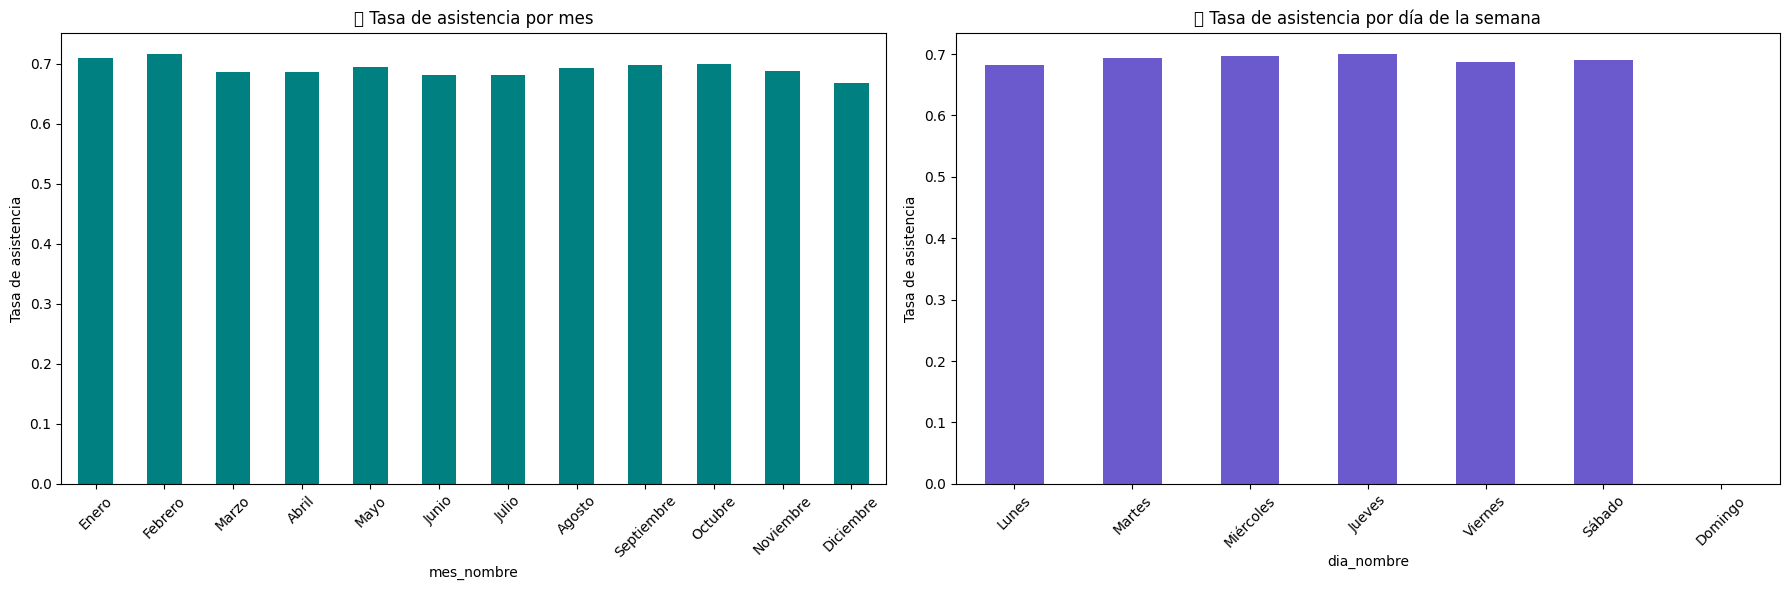

In [37]:
# Asegurar formato de fecha válido
df_completo["fecha_inicio"] = pd.to_datetime(df_completo["fecha_inicio"], errors="coerce")
df_completo = df_completo.dropna(subset=["fecha_inicio"])

# Crear variables de calendario desde cero
df_completo["mes"] = df_completo["fecha_inicio"].dt.month
df_completo["dia_semana"] = df_completo["fecha_inicio"].dt.dayofweek  # lunes = 0

# Mapas de nombres para orden correcto
meses = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio",
    7: "Julio", 8: "Agosto", 9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}
dias = {
    0: "Lunes", 1: "Martes", 2: "Miércoles", 3: "Jueves",
    4: "Viernes", 5: "Sábado", 6: "Domingo"
}

df_completo["mes_nombre"] = df_completo["mes"].map(meses)
df_completo["dia_nombre"] = df_completo["dia_semana"].map(dias)

# Agrupar por mes
resumen_mes = df_completo.groupby("mes_nombre")[["numeros", "asignados", "asistidos"]].sum()
resumen_mes["tasa_asistencia"] = resumen_mes["asistidos"] / resumen_mes["asignados"].replace(0, pd.NA)
orden_meses = list(meses.values())
resumen_mes = resumen_mes.reindex(orden_meses)

# Agrupar por día
resumen_dia = df_completo.groupby("dia_nombre")[["numeros", "asignados", "asistidos"]].sum()
resumen_dia["tasa_asistencia"] = resumen_dia["asistidos"] / resumen_dia["asignados"].replace(0, pd.NA)
orden_dias = list(dias.values())
resumen_dia = resumen_dia.reindex(orden_dias)

# Graficar
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

resumen_mes["tasa_asistencia"].plot(kind="bar", ax=axes[0], color="teal")
axes[0].set_title("📆 Tasa de asistencia por mes")
axes[0].set_ylabel("Tasa de asistencia")
axes[0].tick_params(axis='x', rotation=45)

resumen_dia["tasa_asistencia"].plot(kind="bar", ax=axes[1], color="slateblue")
axes[1].set_title("📅 Tasa de asistencia por día de la semana")
axes[1].set_ylabel("Tasa de asistencia")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##📈 Análisis de los resultados observados

***📆 Tasa de asistencia por mes***

Se observa una estabilidad general a lo largo del año.

Sin embargo, febrero presenta la mayor tasa de asistencia, lo cual es contraintuitivo, ya que es un mes de vacaciones en Uruguay.

Marzo, abril y diciembre se ubican entre los de menor asistencia relativa.

***📌 Interpretación posible:***

Febrero podría concentrar controles previos al inicio de clases o actividades anuales.

Marzo y abril, en cambio, podrían sufrir un efecto de desorganización de agendas por el comienzo de año.

Diciembre suele verse afectado por cierres administrativos, fiestas o menos disponibilidad de personal.

***📅 Tasa de asistencia por día de la semana***

Las tasas se mantienen relativamente homogéneas entre lunes y sábado.

Domingo no tiene datos, lo que sugiere que no se agendan consultas ambulatorias ese día, lo cual es esperado.

Miércoles y jueves muestran los valores más altos, mientras que lunes y viernes son levemente más bajos.


***📌 Interpretación posible:***

Los días intermedios de la semana suelen tener mejor adherencia, ya que:

Evitan inicios de semana con carga administrativa.

No coinciden con días “puente” o salidas anticipadas.


***🧠 Justificación en función de la hipótesis***

Aunque la hipótesis original se centra en variaciones multianuales y estructurales, este análisis revela que también hay patrones de comportamiento a lo largo del año y de la semana, lo cual aporta valor para:

Optimizar la distribución semanal de especialidades críticas.

Reforzar agendas en meses con menor tasa de asistencia.

Evaluar si algunas unidades deben reconfigurar su planificación temporal.

Este hallazgo no solo complementa la hipótesis, sino que genera recomendaciones concretas de gestión de agendas.





##5. Modelado predictivo de asistencia
🎯 Objetivo:
Construir un modelo supervisado de clasificación que permita predecir si una consulta será asistida o no, a partir de características conocidas antes de la consulta (unidad, especialidad, día, mes, etc.).

Esto aporta herramientas de anticipación al sistema de salud, con fines como:

Alertas preventivas de inasistencia

Reagendamiento automático

Intervenciones personalizadas

📊 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.61      0.34      0.43      5651
           1       0.93      0.98      0.95     51754

    accuracy                           0.91     57405
   macro avg       0.77      0.66      0.69     57405
weighted avg       0.90      0.91      0.90     57405



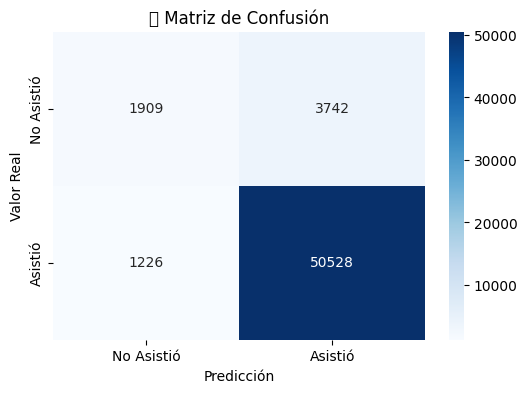

In [38]:
# Paso 1: Preparar dataset para modelado
df_modelo = df_completo.copy()

# Creamos una variable binaria objetivo: asistió o no
df_modelo["asistio"] = (df_modelo["asistidos"] > 0).astype(int)

# Selección de features (todas deben ser conocidas antes del evento)
features = [
    "ua", "especialidad", "mes", "dia_semana",
    "numeros", "asignados"
]

# Codificación categórica
df_modelo["ua"] = df_modelo["ua"].astype(str).str.strip().str.upper()
df_modelo["especialidad"] = df_modelo["especialidad"].astype(str).str.strip().str.lower()
df_modelo = df_modelo.dropna(subset=features + ["asistio"])

# One-hot encoding
df_dummies = pd.get_dummies(df_modelo[features], drop_first=True)
X = df_dummies
y = df_modelo["asistio"]

# Separar entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar modelo simple: Random Forest
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Evaluación
from sklearn.metrics import classification_report, confusion_matrix
print("📊 Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=["No Asistió", "Asistió"], yticklabels=["No Asistió", "Asistió"])
plt.title("🔍 Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

##📈 Resultados del modelo predictivo
**🧮 Métricas generales:**

Accuracy (exactitud total): 91%

Precision para clase 1 (asistió): 93%

Recall para clase 1 (asistió): 98%

F1-score para clase 1: (0.95)

***📌 Interpretación:***

El modelo tiene muy buen desempeño prediciendo los casos donde el paciente asistirá.

Sin embargo, detecta mal los casos de inasistencia:

Precision para clase 0 (no asistió): 61%

Recall para clase 0: 34% → esto indica que solo detecta correctamente 1 de cada 3 inasistencias reales.

🧊 Matriz de confusión
Predijo No Asistió	Predijo Asistió

No asistió (real)	1909	3742

Asistió (real)	1226	50,528


**📌 Lectura:**

El modelo acierta mucho en casos positivos (asistencias).

Pero confunde muchas inasistencias como si fueran asistencias.

**🧠 Análisis de valor**

El modelo funciona bien para identificar consultas que efectivamente se cumplirán, lo cual puede servir para confirmaciones automáticas.

Para detectar casos de riesgo de inasistencia, el rendimiento es limitado en esta versión inicial, lo que indica que:

Las variables usadas (unidad, especialidad, día, mes, etc.) no capturan completamente los factores que explican la ausencia.

Es probable que información adicional (como historial de asistencia del paciente, edad, notificaciones recibidas, condiciones socioeconómicas, etc.) mejore la capacidad del modelo para prevenir ausencias.

**✅ Conclusión del modelo:**

El modelo demuestra que es posible anticipar con alto nivel de certeza las asistencias, pero requiere más variables o refinamiento para detectar con precisión los casos de inasistencia. Aun así, representa una primera prueba de concepto valiosa para la implementación de alertas preventivas o ajustes dinámicos de agenda

#📊 Bloque 1: Histogramas de distribución

**1️⃣ Código: Histogramas para variables numéricas**

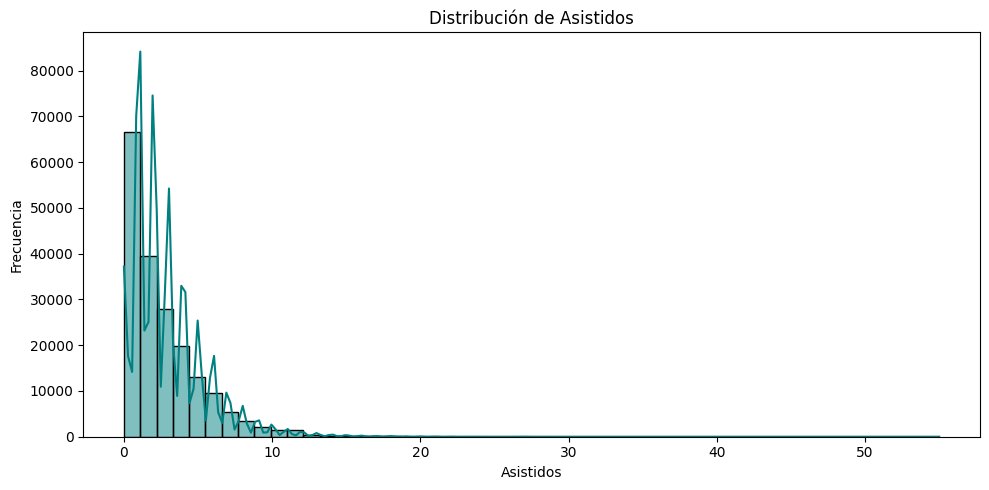

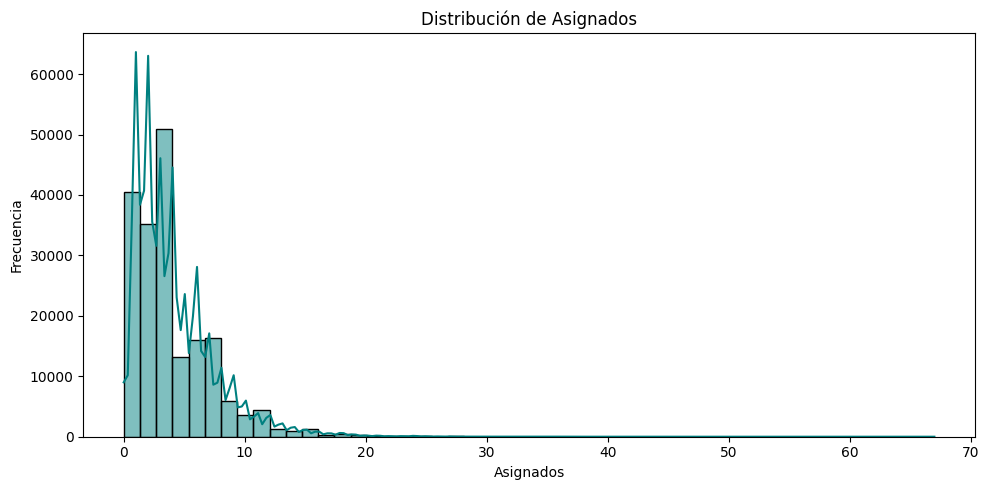

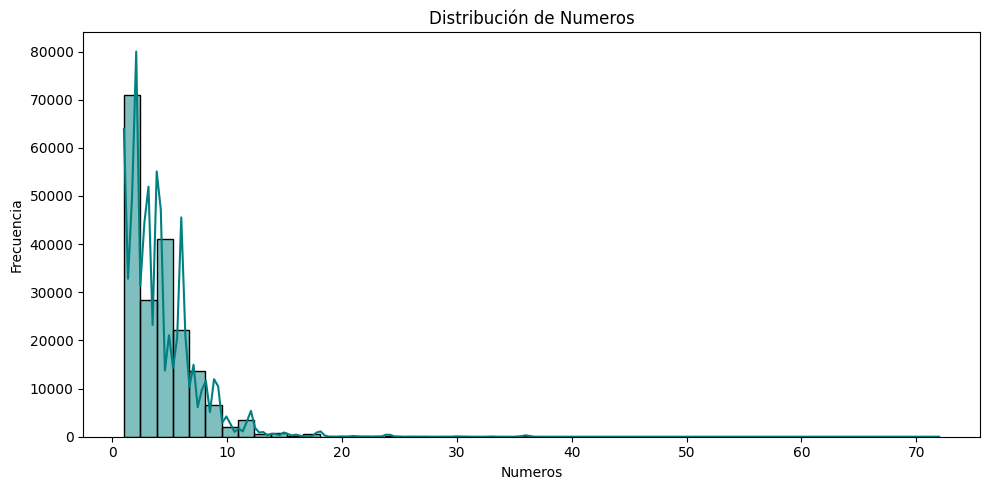

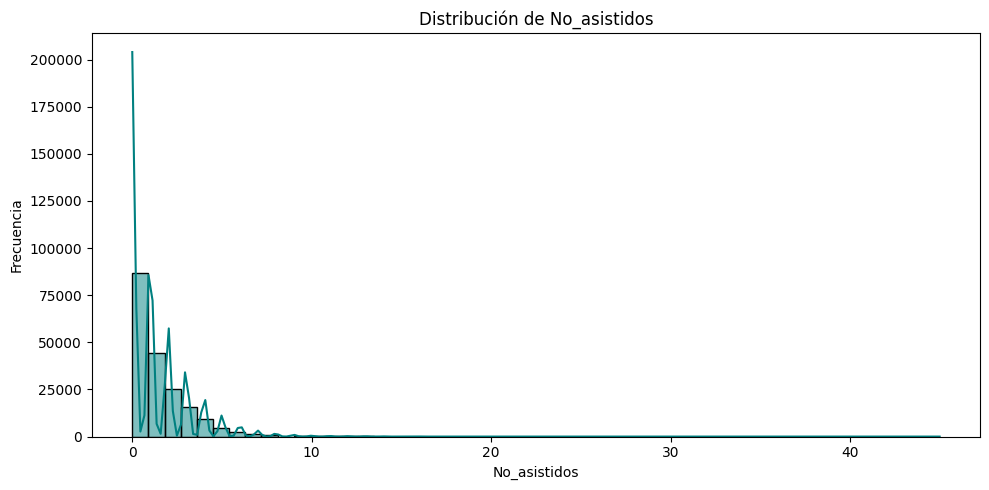

In [40]:
variables_numericas = ["asistidos", "asignados", "numeros", "no_asistidos"]

# Calculate 'no_asistidos' if it doesn't exist
if 'no_asistidos' not in df_completo.columns:
    df_completo["no_asistidos"] = df_completo["asignados"] - df_completo["asistidos"]

for var in variables_numericas:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_completo[var], bins=50, kde=True, color="teal")
    plt.title(f"Distribución de {var.capitalize()}")
    plt.xlabel(var.capitalize())
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

📌 Interpretación:

Distribuciones con fuerte sesgo positivo (cola a la derecha).

 Reflejan agendas mayoritariamente pequeñas y unas pocas con cargas altas. Muestra la necesidad de segmentar análisis y gestión.

#2️⃣ Código: Frecuencia por especialidad y unidad asistencial

<Axes: xlabel='count', ylabel='especialidad'>

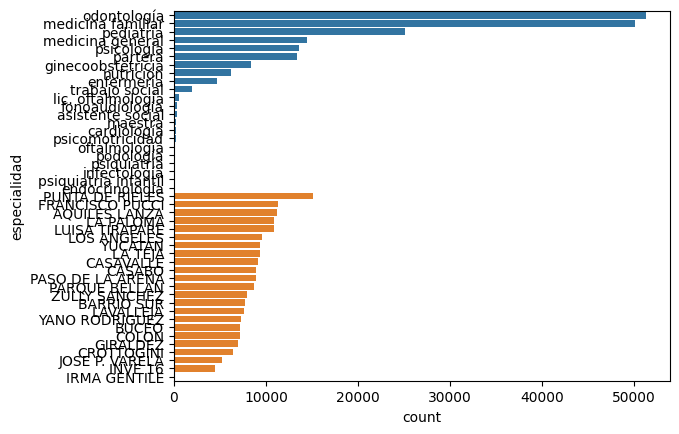

In [41]:
sns.countplot(data=df_completo, y="especialidad", order=df_completo["especialidad"].value_counts().index)
sns.countplot(data=df_completo, y="ua", order=df_completo["ua"].value_counts().index)

📌 Interpretación:

Algunas especialidades/unidades concentran gran parte de los datos, sugiriendo cargas desiguales en el sistema.

#📈 Bloque 2: Análisis bivariado

**1️⃣ Código: Scatterplot asignados vs asistidos**

<Axes: xlabel='asignados', ylabel='asistidos'>

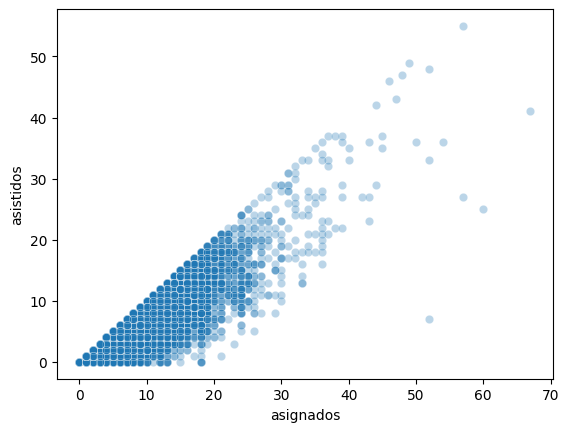

In [42]:
sns.scatterplot(data=df_completo, x="asignados", y="asistidos", alpha=0.3)

📌 Interpretación:

Relación positiva, pero con muchos casos debajo de la diagonal ideal **(asistidos < asignados)**. Evidencia de ausentismo relevante en gran parte del sistema.

<Axes: xlabel='numeros', ylabel='asistidos'>

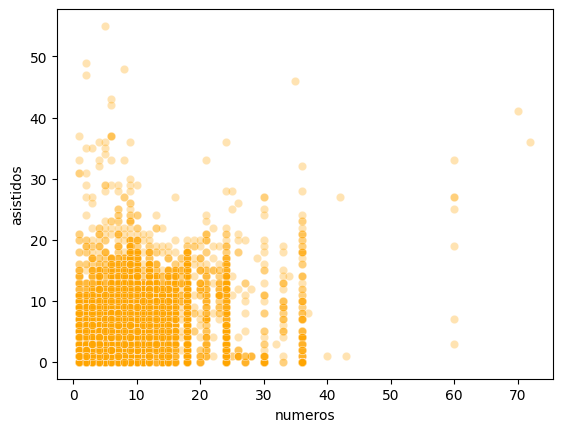

In [43]:
sns.scatterplot(data=df_completo, x="numeros", y="asistidos", alpha=0.3, color='orange')

📌 Interpretación:

No hay correspondencia perfecta entre oferta y asistencia.

Algunas agendas sobredimensionadas no generan mayor asistencia, reflejando ineficiencia en planificación.

#3️⃣ Código: Barplot de no_asistidos por especialidad

<Axes: xlabel='no_asistidos', ylabel='especialidad'>

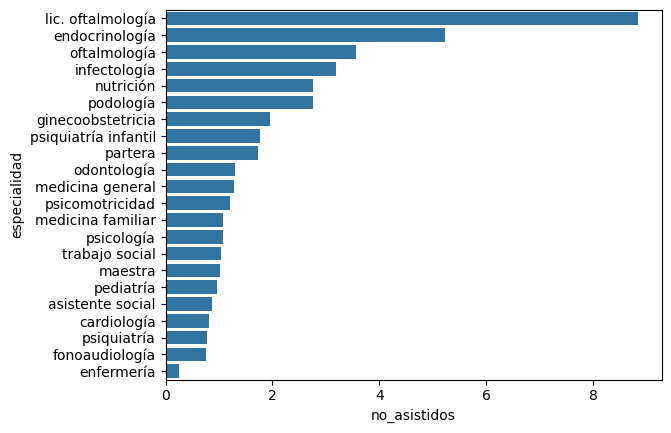

In [44]:
resumen_especialidad = df_completo.groupby("especialidad")[["no_asistidos"]].mean().sort_values("no_asistidos", ascending=False)
sns.barplot(x=resumen_especialidad["no_asistidos"], y=resumen_especialidad.index)

📌 Interpretación:

Especialidades como psicología, nutrición y odontología presentan altos niveles promedio de no asistencia. Necesitan estrategias específicas de mejora.

#📦 Bloque 3: Análisis de Outliers con Boxplots

**1️⃣ Código: Boxplot general de asistidos**


<Axes: xlabel='asistidos'>

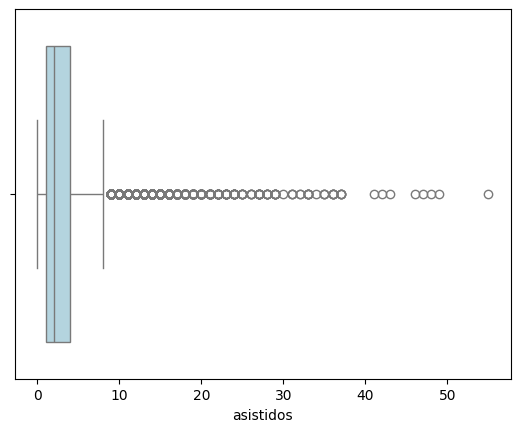

In [45]:
sns.boxplot(data=df_completo, x="asistidos", color="lightblue")

📌 Interpretación:

Se observan muchos outliers superiores. Reafirma la existencia de agendas muy desiguales.

#2️⃣ Código: Boxplot de asistidos por especialidad




<Axes: xlabel='asistidos', ylabel='especialidad'>

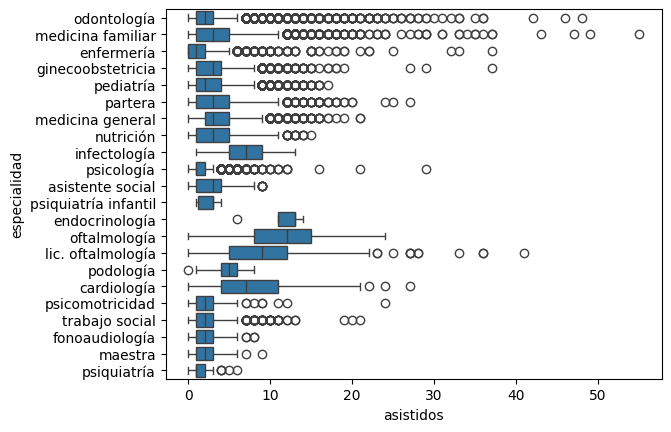

In [46]:
sns.boxplot(data=df_completo, x="asistidos", y="especialidad", orient="h")


📌 Interpretación:

Alta variabilidad entre especialidades. Algunas muy estables, otras con extremos. Confirma necesidad de segmentar la planificación.

#3️⃣ Código: Boxplot de asistidos por unidad asistencial

<Axes: xlabel='asistidos', ylabel='ua'>

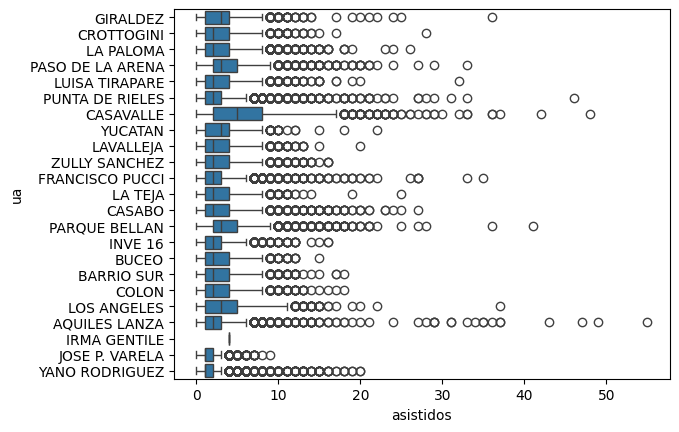

In [47]:
sns.boxplot(data=df_completo, x="asistidos", y="ua", orient="h")

#✅ Conclusión Parcial – Análisis Exploratorio del Dataset de Consultas Médicas (2022–2025)
Durante la etapa exploratoria se identificaron los siguientes patrones y hallazgos clave:


**📌 Variables categóricas**
Las columnas categóricas especialidad y ua (unidad asistencial) presentan distribuciones desbalanceadas: ciertas especialidades concentran gran parte de las consultas (ej. medicina familiar, pediatría), mientras que otras tienen poca representación.

Este desbalance también se observa en las unidades asistenciales, lo cual podría reflejar inequidades en la distribución territorial de la atención médica.

Se recomienda aplicar codificación categórica (one-hot o label encoding) para preparar estas variables en etapas de modelado predictivo.

**📌 Variables numéricas **

Las variables asistidos, asignados, numeros y no_asistidos presentan distribuciones sesgadas a la derecha (muchos valores bajos y pocos extremos altos), lo cual es característico en sistemas de salud con alta proporción de agendas pequeñas o baja demanda.

Se detectaron diferencias significativas en la distribución según el año:

2022 y 2025 muestran mejor comportamiento estadístico (más simétrico).

2023 presenta mayor dispersión y sesgo, lo que requiere precaución en análisis paramétricos.

Conclusión: La mayoría de las variables no son normales → se sugiere considerar transformaciones estadísticas (log, box-cox) o métodos robustos/no paramétricos en etapas futuras.



**📌 Datos atípicos (Outliers)**

El análisis con boxplots mostró valores extremos especialmente en asistidos por especialidad y unidad.

Algunas unidades como Crottogini o Giraldez presentan agendas con asistencias atípicamente altas, lo que indica posibles sobrecargas estructurales o errores en planificación.

Recomendación: Evaluar si esos valores extremos son consistentes operativamente o producto de errores de carga.

**📌 Patrones temporales**

A lo largo del año, febrero mostró la mayor tasa de asistencia, lo cual podría relacionarse con controles previos al inicio de actividades escolares/laborales.
En cambio, diciembre, marzo y abril presentaron menor tasa.

Por día de la semana, la asistencia fue mayor de martes a jueves, mientras que lunes y viernes fueron levemente más bajos.

Conclusión: Se observan patrones estacionales y semanales relevantes que podrían utilizarse para optimizar agendas.

**📌 Especialidades con mayor ausentismo**

Psicología, nutrición, podología y odontología muestran altos niveles de no asistencia promedio, lo que sugiere necesidad de intervenciones específicas (ej. confirmación activa, mayor flexibilidad horaria, educación del paciente).

#**A partir de aca es elaboración para la proxima entrega**

##7. Preparación para Modelado

```

```



In [23]:
# Definición de target y features (ejemplo de predicción de asistencia)
if 'asistidos' in df_completo.columns and 'numeros' in df_completo.columns and 'asignados' in df_completo.columns and 'libres' in df_completo.columns:
    df_completo['target_asistencia'] = df_completo['asistidos'] > 0
    X = df_completo[['numeros', 'asignados', 'libres']]  # reemplazar con más features relevantes
    y = df_completo['target_asistencia'].astype(int)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
else:
    print("⚠️ Las columnas necesarias para el modelado predictivo no están disponibles en el dataset.")

# NOTA:
 Este bloque representa una versión simplificada del modelado predictivo, pero el modelo final utiliza `df_modelo` y un conjunto de variables más amplio.



##9. Validación y Optimización

In [24]:
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [3, 5, 10]}
skf = StratifiedKFold(n_splits=5)
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=skf)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 3}


10. Conclusiones y Próximos Pasos
¿Qué modelos funcionaron mejor?
¿Qué variables parecen más relevantes?
¿Qué mejoras podrías hacer con más datos o mejores features?

In [6]:
# Importar pandas
import pandas as pd

# Definir rutas de los 4 archivos dentro del repositorio clonado
# NOTE: Make sure the repository is successfully cloned before running this cell.
rutas = {
    2022: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2022_1733330860636.csv",
    2023: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2023_1733330922566.csv",
    2024: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2024.csv",
    2025: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2025.csv"
}

# Inicializar lista de DataFrames
dfs = []

# Verificar carga de los archivos y contar registros por año
print("✅ Verificación de carga de archivos:\n")
for anio, ruta in rutas.items():
    try:
        df = pd.read_csv(ruta, low_memory=False)
        df["año_archivo"] = anio
        dfs.append(df)
        print(f"✔️ Archivo {anio} cargado correctamente con {len(df)} registros.")
    except Exception as e:
        print(f"❌ Error al cargar el archivo del año {anio}: {e}")

# Concatenar todos los DataFrames si al menos uno fue cargado
if dfs:
    df_completo = pd.concat(dfs, ignore_index=True)

    # Convertir fecha_inicio a datetime y extraer año real si existe
    if 'fecha_inicio' in df_completo.columns:
        df_completo['fecha_inicio'] = pd.to_datetime(df_completo['fecha_inicio'], errors='coerce')
        df_completo['año_inicio'] = df_completo['fecha_inicio'].dt.year

    # Mostrar resumen de registros por año de archivo
    print("\n📊 Registros totales por año (según origen del archivo):")
    print(df_completo["año_archivo"].value_counts().sort_index())

    # Mostrar las primeras filas del DataFrame completo
    display(df_completo.head())
else:
    print("❌ No se pudo cargar ningún archivo.")

✅ Verificación de carga de archivos:

❌ Error al cargar el archivo del año 2022: [Errno 2] No such file or directory: 'An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2022_1733330860636.csv'
❌ Error al cargar el archivo del año 2023: [Errno 2] No such file or directory: 'An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2023_1733330922566.csv'
❌ Error al cargar el archivo del año 2024: [Errno 2] No such file or directory: 'An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2024.csv'
❌ Error al cargar el archivo del año 2025: [Errno 2] No such file or directory: 'An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2025.csv'
❌ No se pudo cargar ningún archivo.


In [14]:
# Clonar el repositorio completo (solo una vez por sesión)
!git clone https://github.com/Diego-Silvera/An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025.git

# Importar pandas
import pandas as pd

# Definir rutas de los 4 archivos dentro del repositorio clonado
rutas = {
    2022: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2022_1733330860636.csv",
    2023: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2023_1733330922566.csv",
    2024: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2024.csv",
    2025: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2025.csv"
}

# Inicializar lista de DataFrames
dfs = []

# Verificar carga de los archivos y contar registros por año
print("✅ Verificación de carga de archivos:\n")
for anio, ruta in rutas.items():
    try:
        df = pd.read_csv(ruta, low_memory=False)
        df["año_archivo"] = anio
        dfs.append(df)
        print(f"✔️ Archivo {anio} cargado correctamente con {len(df)} registros.")
    except Exception as e:
        print(f"❌ Error al cargar el archivo del año {anio}: {e}")

# Concatenar todos los DataFrames si al menos uno fue cargado
if dfs:
    df_completo = pd.concat(dfs, ignore_index=True)

    # Convertir fecha_inicio a datetime y extraer año real si existe
    if 'fecha_inicio' in df_completo.columns:
        df_completo['fecha_inicio'] = pd.to_datetime(df_completo['fecha_inicio'], errors='coerce')
        df_completo['año_inicio'] = df_completo['fecha_inicio'].dt.year

    # Mostrar resumen de registros por año de archivo
    print("\n📊 Registros totales por año (según origen del archivo):")
    print(df_completo["año_archivo"].value_counts().sort_index())

    # Mostrar las primeras filas del DataFrame completo
    display(df_completo.head())
else:
    print("❌ No se pudo cargar ningún archivo.")

Cloning into 'An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 1.92 MiB | 3.08 MiB/s, done.
Resolving deltas: 100% (3/3), done.
✅ Verificación de carga de archivos:

✔️ Archivo 2022 cargado correctamente con 50947 registros.
✔️ Archivo 2023 cargado correctamente con 66051 registros.
✔️ Archivo 2024 cargado correctamente con 69476 registros.
✔️ Archivo 2025 cargado correctamente con 4875 registros.

📊 Registros totales por año (según origen del archivo):
año_archivo
2022    50947
2023    66051
2024    69476
2025     4875
Name: count, dtype: int64


,ua,especialidad,estado,fecha_inicio,fecha_fin,numeros,asignados,asistidos,libres,fecha_datos,año_archivo,año_inicio
0,Giraldez,Odontología,Cerrada,2022-01-03 07:00:00,2022-01-03 08:30:00,3,1,1,0,2023-02-10 10:29:20,2022,2022
1,Crottogini,Medicina Familiar,Cerrada,2022-01-03 07:00:00,2022-01-03 09:00:00,6,6,6,0,2023-02-10 10:29:20,2022,2022
2,Crottogini,Medicina Familiar,Cerrada,2022-01-03 07:00:00,2022-01-03 09:40:00,8,9,3,0,2023-02-10 10:29:20,2022,2022
3,La Paloma,Enfermería,Cerrada,2022-01-03 07:00:00,2022-01-03 10:00:00,18,0,0,0,2023-02-10 10:29:20,2022,2022
4,Giraldez,Ginecoobstetricia,Cerrada,2022-01-03 07:15:00,2022-01-03 10:15:00,9,4,4,0,2023-02-10 10:29:20,2022,2022


In [15]:
# Estructura y tipos de datos
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191349 entries, 0 to 191348
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ua            191349 non-null  object        
 1   especialidad  191349 non-null  object        
 2   estado        191349 non-null  object        
 3   fecha_inicio  191349 non-null  datetime64[ns]
 4   fecha_fin     191349 non-null  object        
 5   numeros       191349 non-null  int64         
 6   asignados     191349 non-null  int64         
 7   asistidos     191349 non-null  int64         
 8   libres        191349 non-null  int64         
 9   fecha_datos   191349 non-null  object        
 10  año_archivo   191349 non-null  int64         
 11  año_inicio    191349 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(5), object(5)
memory usage: 16.8+ MB
